In [41]:
import csv
import os
import sys
import numpy as np
import pandas as pd

In [42]:
data = pd.read_csv('test.csv', encoding='utf-8')
data.head()


,timestamp,distance,acceleration_x,acceleration_y,acceleration_z,rotation_x,rotation_y,rotation_z,OperationStatus,ExcerciseType
0,0.059131,0.9788223505020142 m,-0.003777,0.031753,-0.036307,0.040546,-0.104245,0.007477,Stop,Squat
1,0.146318,NaN,-0.007651,0.035928,-0.046347,0.165101,-0.137947,-0.125681,Stop,Squat
2,0.209211,NaN,0.030076,0.043656,-0.068182,0.179393,-0.331398,-0.178442,Stop,Squat
3,0.265481,1.9996156692504883 m,0.024731,-0.000526,-0.005870,0.318460,-0.338512,-0.278155,Stop,Squat
4,0.386773,1.1377123594284058 m,0.024731,-0.000526,-0.005870,0.318460,-0.338512,-0.278155,Stop,Squat


In [43]:
data.describe()

,timestamp,acceleration_x,acceleration_y,acceleration_z,rotation_x,rotation_y,rotation_z
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,5.739595,-0.005112,-0.002297,0.005376,0.022520,0.001719,-0.011010
std,3.362782,0.032324,0.026942,0.043394,0.108681,0.116896,0.154914
min,0.059131,-0.130138,-0.062660,-0.095171,-0.188837,-0.338512,-0.534272
25%,2.855135,-0.016577,-0.017083,-0.019972,-0.038238,-0.040599,-0.039098
50%,5.711668,-0.004021,-0.001120,0.001456,0.005031,-0.001076,-0.002564
75%,8.621240,0.006713,0.008171,0.023915,0.072388,0.059430,0.024276
max,11.485088,0.108375,0.122045,0.139543,0.318460,0.257192,0.481571


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   timestamp        116 non-null    float64
 1   distance         74 non-null     object 
 2   acceleration_x   116 non-null    float64
 3   acceleration_y   116 non-null    float64
 4   acceleration_z   116 non-null    float64
 5   rotation_x       116 non-null    float64
 6   rotation_y       116 non-null    float64
 7   rotation_z       116 non-null    float64
 8   OperationStatus  116 non-null    object 
 9   ExcerciseType    116 non-null    object 
dtypes: float64(7), object(3)
memory usage: 9.2+ KB


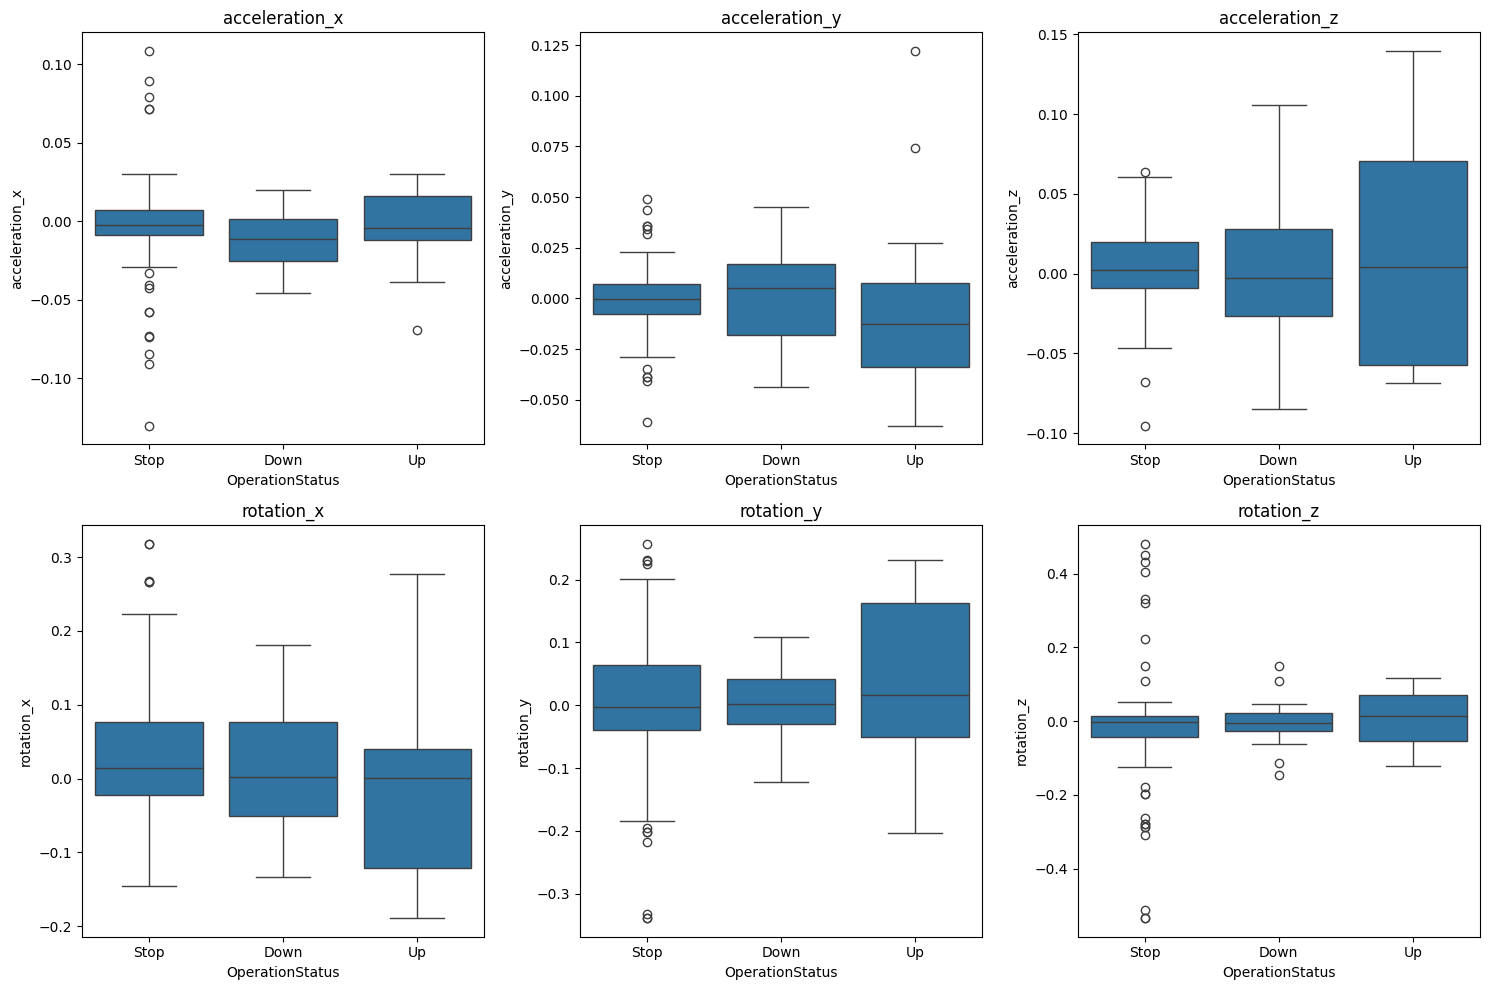

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2,3, figsize=(15, 10))

sns.boxplot(x='OperationStatus', y='acceleration_x', data=data, ax=axes[0,0]).set_title('acceleration_x')
sns.boxplot(x='OperationStatus', y='acceleration_y', data=data, ax=axes[0,1]).set_title('acceleration_y')
sns.boxplot(x='OperationStatus', y='acceleration_z', data=data, ax=axes[0,2]).set_title('acceleration_z')
sns.boxplot(x='OperationStatus', y='rotation_x', data=data, ax=axes[1,0]).set_title('rotation_x')
sns.boxplot(x='OperationStatus', y='rotation_y', data=data, ax=axes[1,1]).set_title('rotation_y')
sns.boxplot(x='OperationStatus', y='rotation_z', data=data, ax=axes[1,2]).set_title('rotation_z')

plt.tight_layout()
plt.show()



In [46]:
up_accel_x = data[data['OperationStatus'] == 'Up']['acceleration_x'].mean()
down_accel_x = data[data['OperationStatus'] == 'Down']['acceleration_x'].mean()
stop_accel_X = data[data['OperationStatus'] == 'Stop']['acceleration_x'].mean()

print(f"up_accel_x: {up_accel_x:.4f}, down_accel_x: {down_accel_x:.4f}, stop_accel_x: {stop_accel_X:.4f}")


up_accel_x: -0.0026, down_accel_x: -0.0117, stop_accel_x: -0.0033


In [47]:
up_accel_y = data[data['OperationStatus'] == 'Up']['acceleration_y'].mean()
down_accel_y = data[data['OperationStatus'] == 'Down']['acceleration_y'].mean()
stop_accel_y = data[data['OperationStatus'] == 'Stop']['acceleration_y'].mean()

print(f"up_accel_y: {up_accel_y:.4f}, down_accel_y: {down_accel_y:.4f}, stop_accel_y: {stop_accel_y:.4f}")

up_accel_y: -0.0094, down_accel_y: 0.0009, stop_accel_y: -0.0009


In [48]:
up_accel_z = data[data['OperationStatus'] == 'Up']['acceleration_z'].mean()
down_accel_z = data[data['OperationStatus'] == 'Down']['acceleration_z'].mean()
stop_accel_z = data[data['OperationStatus'] == 'Stop']['acceleration_z'].mean()

print(f"up_accel_z: {up_accel_z:.4f}, down_accel_z: {down_accel_z:.4f}, stop_accel_z: {stop_accel_z:.4f}")

up_accel_z: 0.0093, down_accel_z: 0.0044, stop_accel_z: 0.0042


In [49]:
up_rot_x = data[data['OperationStatus'] == 'Up']['rotation_x'].mean()
down_rot_x = data[data['OperationStatus'] == 'Down']['rotation_x'].mean()
stop_rot_x = data[data['OperationStatus'] == 'Stop']['rotation_x'].mean()

print(f"up_rot_x: {up_rot_x:.4f}, down_rot_x: {down_rot_x:.4f}, stop_rot_x: {stop_rot_x:.4f}")

up_rot_x: -0.0121, down_rot_x: 0.0133, stop_rot_x: 0.0399


In [50]:
up_rot_y = data[data['OperationStatus'] == 'Up']['rotation_y'].mean()
down_rot_y = data[data['OperationStatus'] == 'Down']['rotation_y'].mean()
stop_rot_y = data[data['OperationStatus'] == 'Stop']['rotation_y'].mean()

print(f"up_rot_y: {up_rot_y:.4f}, down_rot_y: {down_rot_y:.4f}, stop_rot_y: {stop_rot_y:.4f}")

up_rot_y: 0.0291, down_rot_y: -0.0011, stop_rot_y: -0.0078


In [51]:
up_rot_z = data[data['OperationStatus'] == 'Up']['rotation_z'].mean()
down_rot_z = data[data['OperationStatus'] == 'Down']['rotation_z'].mean()
stop_rot_z = data[data['OperationStatus'] == 'Stop']['rotation_z'].mean()

print(f"up_rot_z: {up_rot_z:.4f}, down_rot_z: {down_rot_z:.4f}, stop_rot_z: {stop_rot_z:.4f}")

up_rot_z: 0.0037, down_rot_z: -0.0044, stop_rot_z: -0.0195


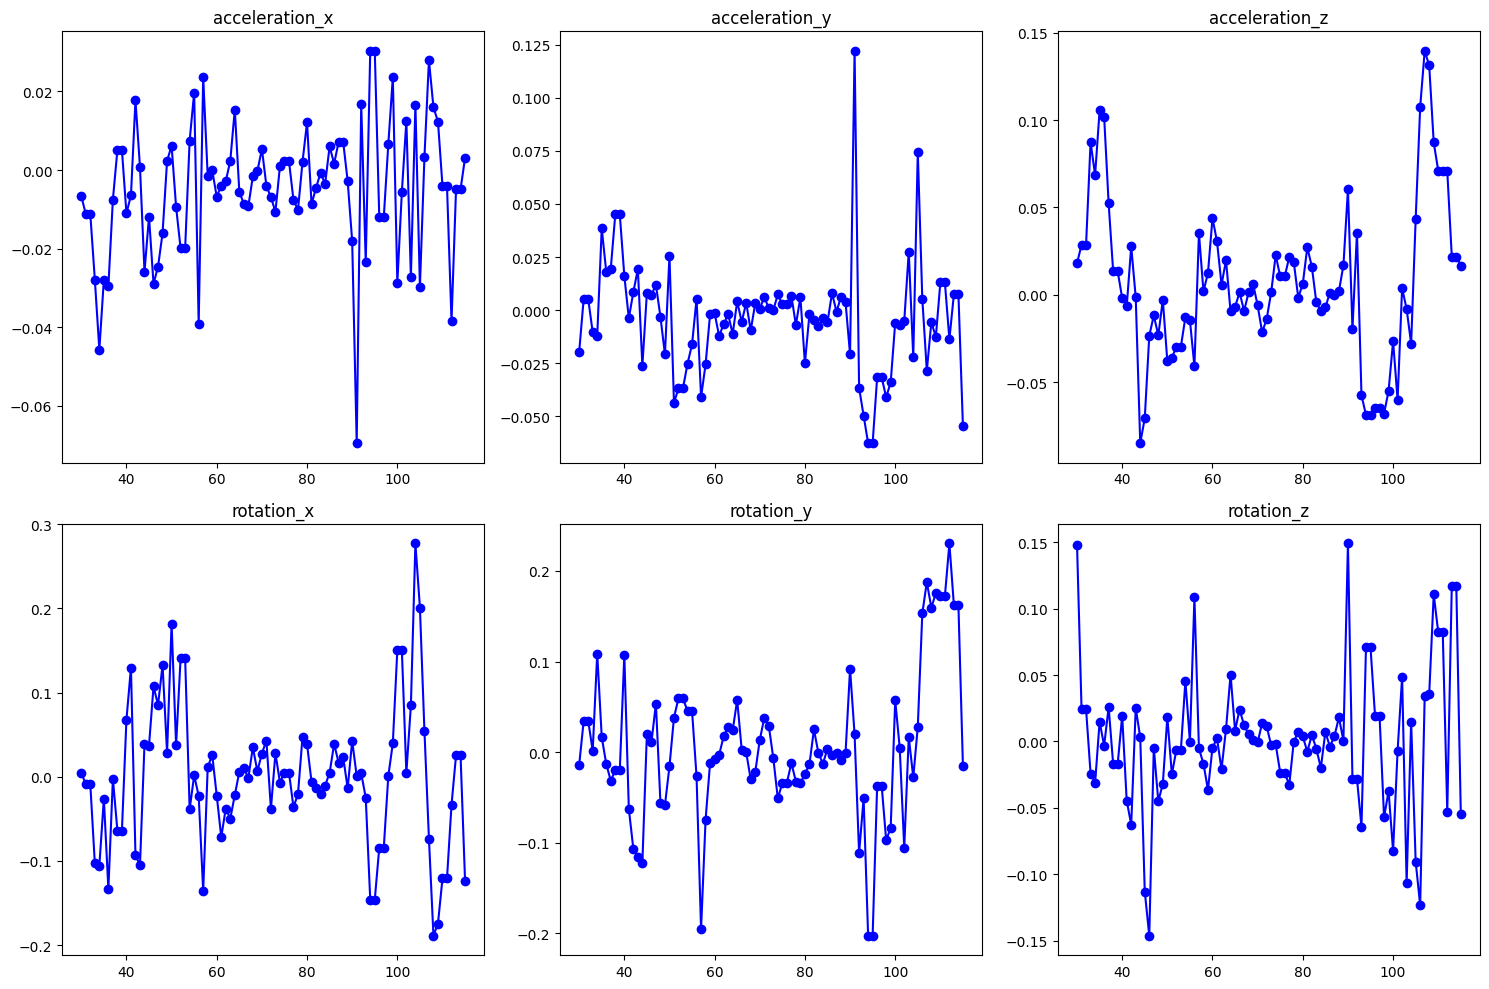

In [55]:
df_30_116 = data.iloc[30:116]

colums = ['acceleration_x', 'acceleration_y', 'acceleration_z', 'rotation_x', 'rotation_y', 'rotation_z']

fig, axes = plt.subplots(2,3, figsize=(15, 10))

for i, col in enumerate(colums):
    ax = axes[i//3, i%3]
    ax.plot(df_30_116.index, df_30_116[col], marker='o', linestyle='-', color='blue')
    ax.set_title(col)

plt.tight_layout()
plt.show()

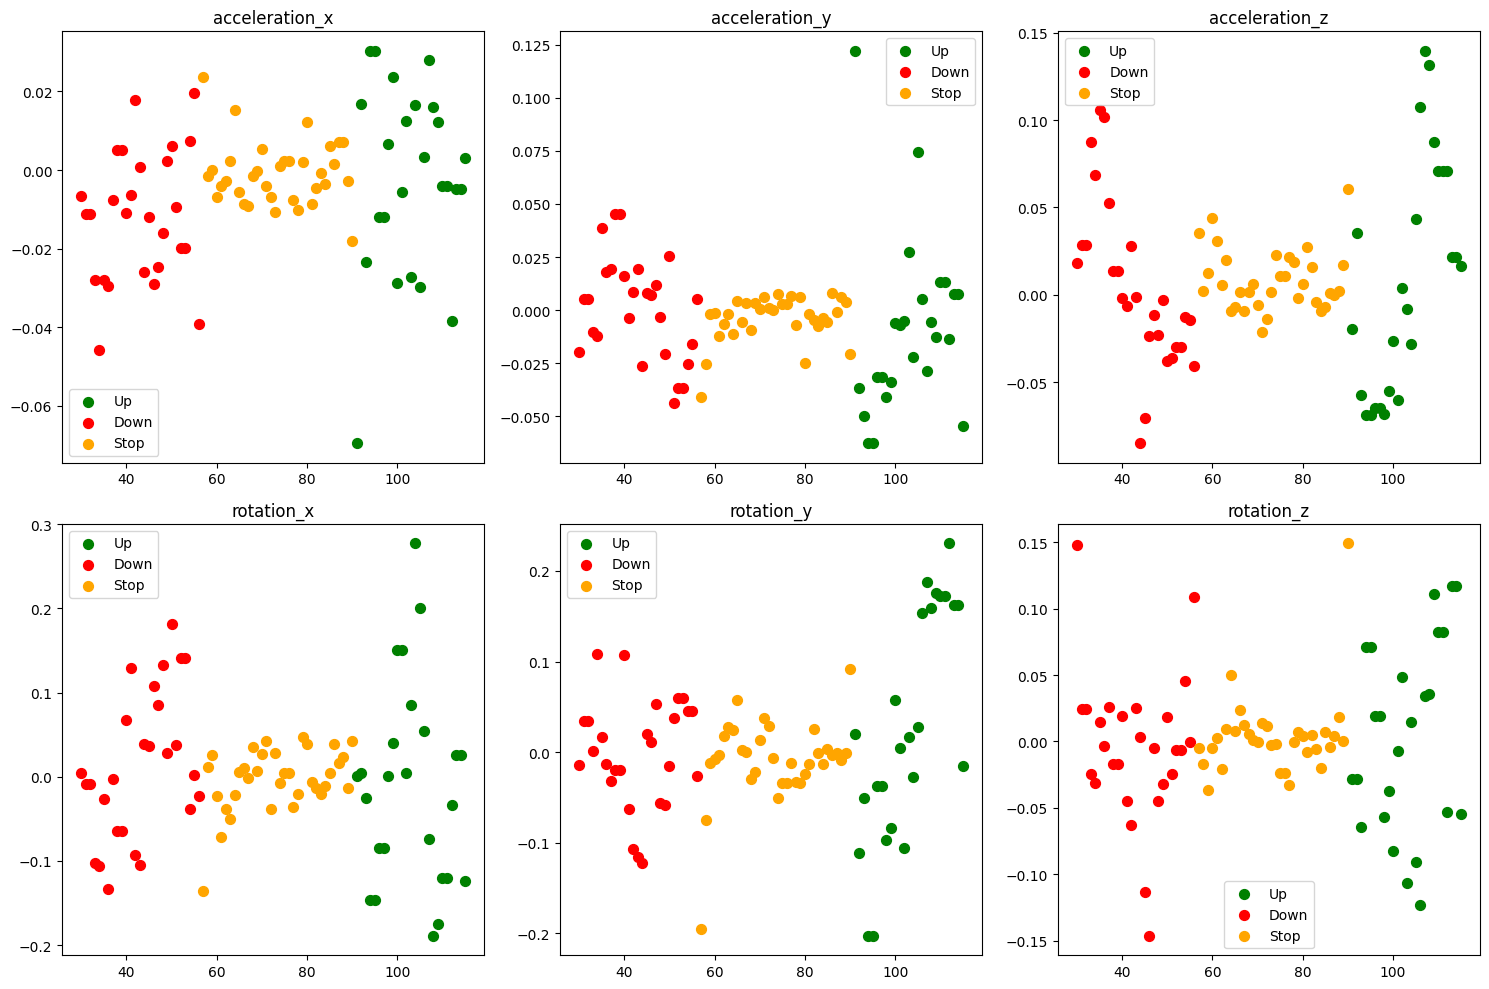

In [56]:
color_map = {
    'Up': 'green',
    'Down': 'red',
    'Stop': 'orange'
}

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, col in enumerate(colums):
    ax = axes[i // 3, i % 3]
    
    for status, color in color_map.items():
        # 해당 status를 가진 데이터만 선택
        mask = df_30_116['OperationStatus'] == status
        ax.scatter(df_30_116.index[mask], df_30_116.loc[mask, col], color=color, label=status, s=50)
    
    ax.set_title(col)
    ax.legend()

plt.tight_layout()
plt.show()